In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'data.csv'
df = pd.read_csv(file_path)


In [6]:
df['release_year'] = df['release_date'].str[:4].astype(int)
df['decade'] = (df['release_year'] // 10) * 10

# Check karne ke liye
print(df[['release_date', 'release_year', 'decade']].head())

  release_date  release_year  decade
0         1921          1921    1920
1         1921          1921    1920
2         1921          1921    1920
3         1921          1921    1920
4         1921          1921    1920


In [7]:
columns_to_keep = [
    'name', 'artists', 'popularity', 'release_year', 'decade', 'danceability',
    'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit'
]
df_cleaned = df[columns_to_keep].copy()
df_cleaned['main_artist'] = df_cleaned['artists'].apply(lambda x: x.split(',')[0].strip("[]'"))


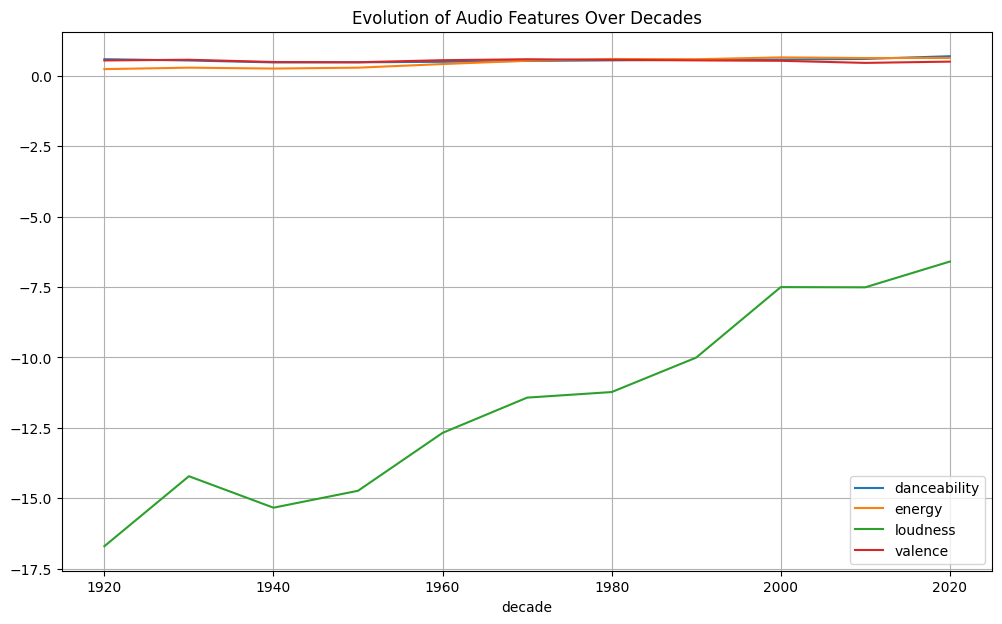

In [8]:
# 1. Trends over decades
features_to_analyze = ['danceability', 'energy', 'loudness', 'valence']
decade_trends = df_cleaned.groupby('decade')[features_to_analyze].mean()
decade_trends.plot(figsize=(12, 7), grid=True, title='Evolution of Audio Features Over Decades')
plt.show()


In [9]:
# 2. Top 10 artists by popularity
top_artists = df_cleaned.groupby('main_artist')['popularity'].sum().nlargest(10)
print("\nTop 10 Artists (by Popularity):")
print(top_artists)



Top 10 Artists (by Popularity):
main_artist
Frank Sinatra            21327
The Beatles              19347
Elvis Presley            17608
The Rolling Stones       16829
Fleetwood Mac            15675
Bob Dylan                14892
Johnny Cash              14287
Johann Sebastian Bach    13508
Led Zeppelin             13498
Queen                    13414
Name: popularity, dtype: int64


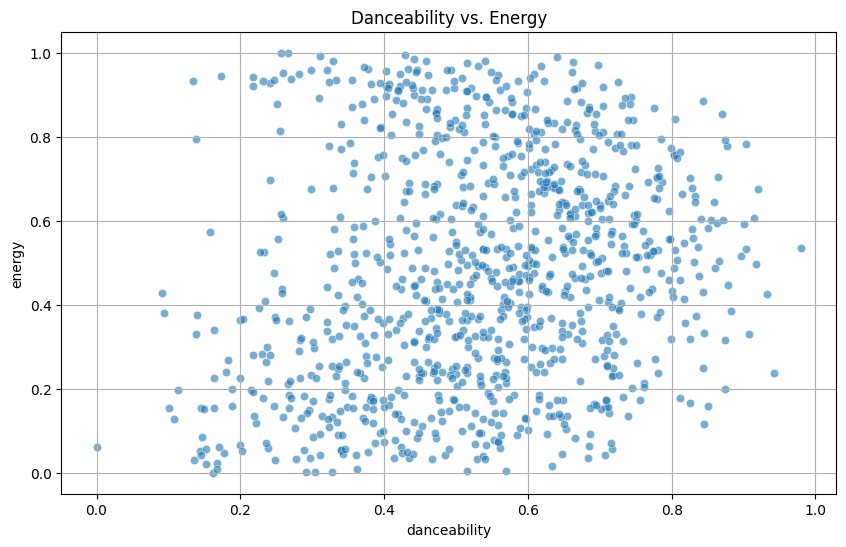

In [10]:
# 3. Danceability vs Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned.sample(1000), x='danceability', y='energy', alpha=0.6)
plt.title('Danceability vs. Energy')
plt.grid(True)
plt.show()


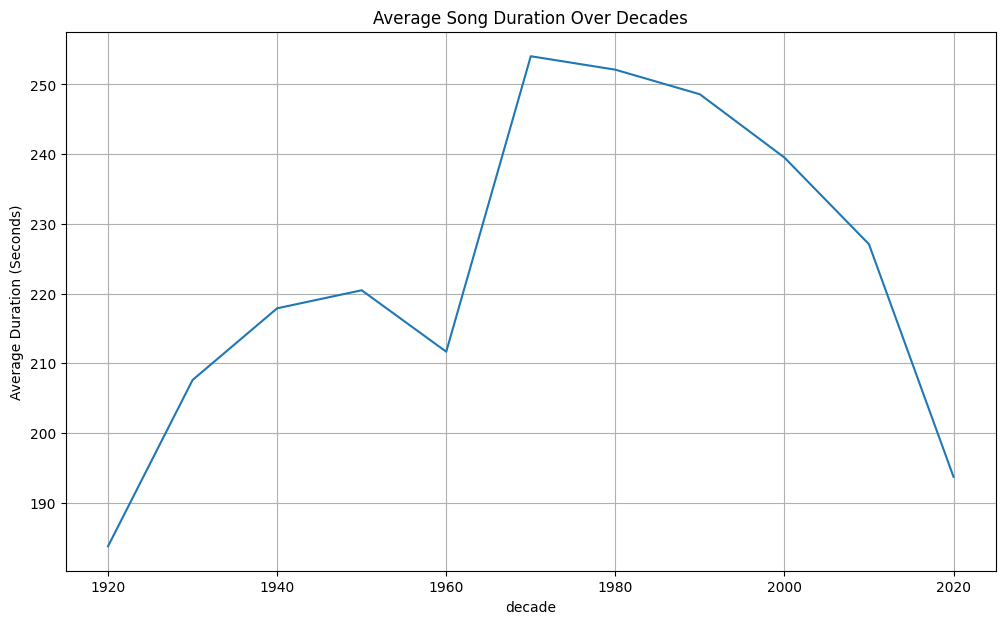

In [11]:
# 4. Song duration trend
df_cleaned['duration_s'] = df_cleaned['duration_ms'] / 1000
duration_trend = df_cleaned.groupby('decade')['duration_s'].mean()
duration_trend.plot(kind='line', figsize=(12, 7), grid=True, title='Average Song Duration Over Decades')
plt.ylabel('Average Duration (Seconds)')
plt.show()


In [12]:
# 5. Explicit vs. Non-Explicit songs
print("\nExplicit vs. Non-Explicit Analysis:")
explicit_comparison = df_cleaned.groupby('explicit')[['popularity', 'energy', 'danceability', 'valence']].mean()
print(explicit_comparison)



Explicit vs. Non-Explicit Analysis:
          popularity    energy  danceability   valence
explicit                                              
0          30.161042  0.471592      0.524452  0.530076
1          45.186171  0.599257      0.677490  0.512472


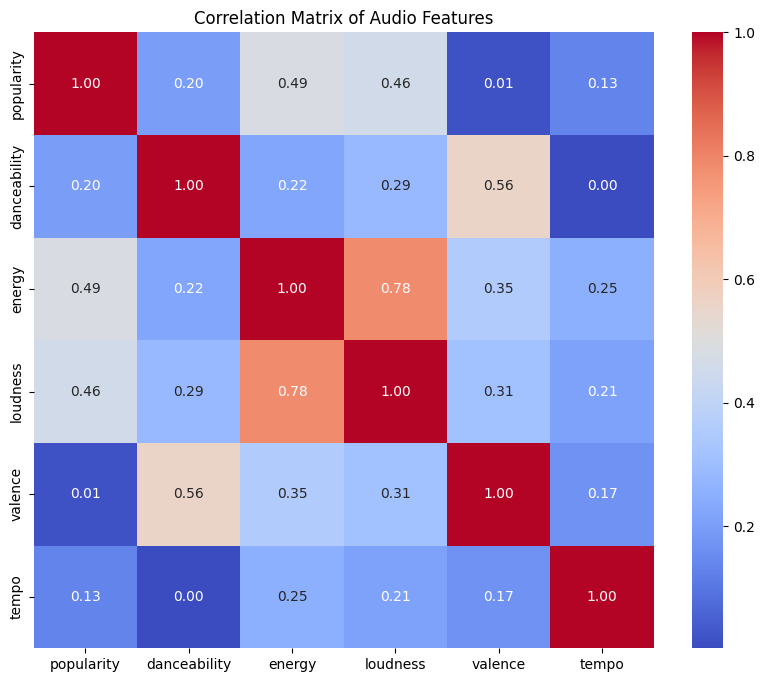

In [13]:
# 6. Correlation heatmap
audio_features = df_cleaned[['popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo']]
correlation_matrix = audio_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.show()


In [14]:
# 7. Top 10 artists by song count
top_prolific_artists = df_cleaned['main_artist'].value_counts().nlargest(10)
print("\nTop 10 Artists (by Song Count):")
print(top_prolific_artists)



Top 10 Artists (by Song Count):
main_artist
Francisco Canaro           2227
Эрнест Хемингуэй           1211
Эрих Мария Ремарк          1068
Frédéric Chopin            1016
Wolfgang Amadeus Mozart     920
Johann Sebastian Bach       901
Ludwig van Beethoven        886
Frank Sinatra               738
Billie Holiday              680
Igor Stravinsky             637
Name: count, dtype: int64


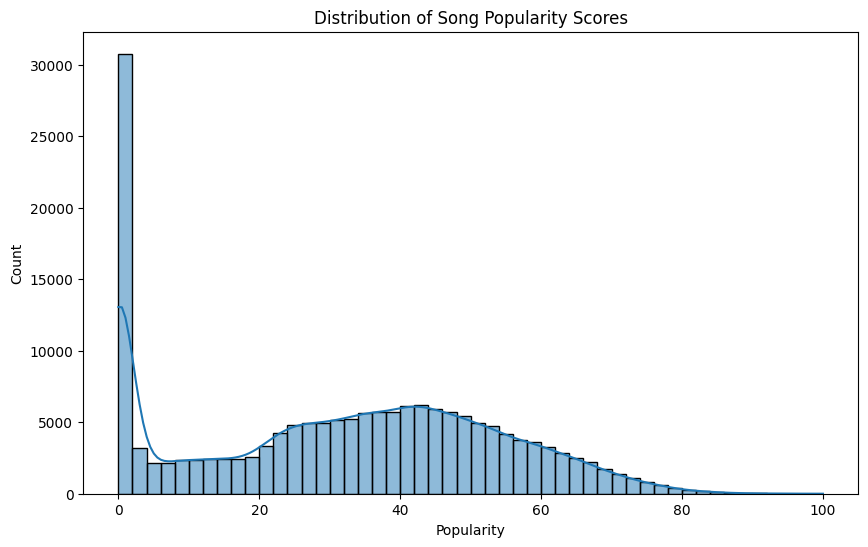

In [15]:
# 9. Popularity score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['popularity'], bins=50, kde=True)
plt.title('Distribution of Song Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

In [ ]:
# --- Export ---
output_filename = 'spotify_cleaned_for_tableau.csv'
df_cleaned.to_csv(output_filename, index=False)
print(f"\nClean data saved to: {output_filename}")